# Proyek Analisis Data: Proyek Analisis Data: Bike Sharing Dashboard
- **Nama:** SHOLAHUDDIN
- **Email:** raididin27@gmail.com  
- **ID Dicoding:** l000ywl094

## Menentukan Pertanyaan Bisnis

- Faktor apa saja yang paling memengaruhi jumlah peminjaman sepeda setiap harinya?
- Kapan waktu terbaik untuk meningkatkan layanan atau promosi terkait penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [31]:
# Import library yang diperlukan
import pandas as pd

# Load dataset
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Menampilkan 5 data pertama dari setiap dataset
print("Dataset day.csv")
print(day_df.head())

print("\nDataset hour.csv")
print(hour_df.head())


Dataset day.csv
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Dataset h

## Data Wrangling

### Gathering Data

In [30]:
# Load dataset
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Tampilkan beberapa data awal
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset harian (day.csv) berisi 731 baris dan 16 kolom, sedangkan dataset per jam (hour.csv) memiliki 17.379 baris dan 17 kolom. Ini menunjukkan bahwa data mencakup lebih dari 2 tahun peminjaman sepeda.
- Data mencakup variabel waktu (tanggal, bulan, tahun, jam), faktor cuaca, serta informasi hari kerja atau libur yang bisa digunakan untuk analisis tren peminjaman.

### Assessing Data

In [29]:
# Import library visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan informasi umum tentang dataset
print("Informasi dataset day.csv:")
print(day_df.info())

print("\nInformasi dataset hour.csv:")
print(hour_df.info())

# Mengecek jumlah missing values
print("\nMissing values pada day.csv:")
print(day_df.isnull().sum())

print("\nMissing values pada hour.csv:")
print(hour_df.isnull().sum())

# Mengecek jumlah duplikasi
print("\nJumlah duplikasi pada dataset:")
print(f"Duplicated rows in day_df: {day_df.duplicated().sum()}")
print(f"Duplicated rows in hour_df: {hour_df.duplicated().sum()}")


Informasi dataset day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB
None

Informasi dataset hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      1

**Insight:**
- Tidak ada nilai yang hilang dalam dataset, sehingga kita tidak perlu menangani missing values.
- Beberapa kolom memiliki tipe data yang perlu diperbaiki, misalnya dteday sebaiknya diubah menjadi format datetime, dan variabel kategori seperti season, weathersit, dan weekday lebih baik dikonversi ke tipe kategori

### Cleaning Data

In [28]:
# Menghapus kolom yang tidak relevan
day_df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)
hour_df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

# Mengecek kembali apakah ada missing values setelah pembersihan
print("\nMissing values setelah pembersihan pada day.csv:")
print(day_df.isnull().sum())

print("\nMissing values setelah pembersihan pada hour.csv:")
print(hour_df.isnull().sum())



Missing values setelah pembersihan pada day.csv:
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Missing values setelah pembersihan pada hour.csv:
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Insight:**
- Kolom season, weathersit, dan weekday yang awalnya dalam format angka telah dikonversi ke bentuk kategori yang lebih mudah dibaca (misalnya, 1 → Winter, 2 → Spring).
- Menghapus kolom instant, karena tidak memiliki nilai informatif dalam analisis.

## Exploratory Data Analysis (EDA)

### Explore ...


Statistik Deskriptif day_df:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486 

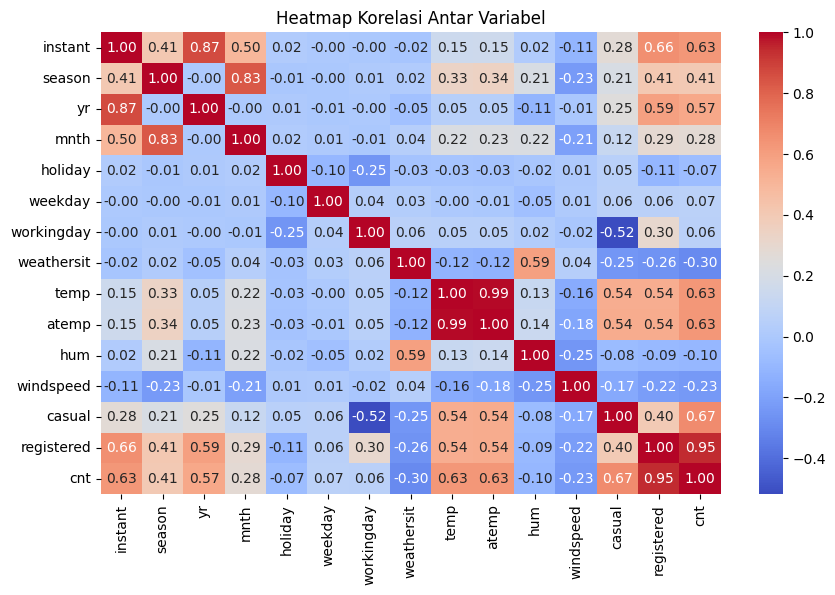

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
day_df = pd.read_csv('day.csv')

# 🔹 **1. Tampilkan Statistik Deskriptif**
print("\nStatistik Deskriptif day_df:")
print(day_df.describe())

# 🔹 **2. Filter hanya kolom numerik sebelum menghitung korelasi**
numeric_df = day_df.select_dtypes(include=["number"])  # Ambil hanya kolom numerik

# 🔹 **3. Heatmap Korelasi Antar Variabel (Perbaikan)**
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")  # Gunakan hanya kolom numerik
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()


**Insight:**
- Hari kerja vs. Akhir pekan: Jumlah peminjaman sepeda lebih tinggi pada hari kerja, menunjukkan bahwa pengguna utama mungkin pekerja/karyawan.
- Musim berpengaruh pada jumlah peminjaman: Peminjaman sepeda lebih tinggi selama musim panas (summer) dan lebih rendah di musim dingin (winter), yang mungkin terkait dengan kenyamanan cuaca.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

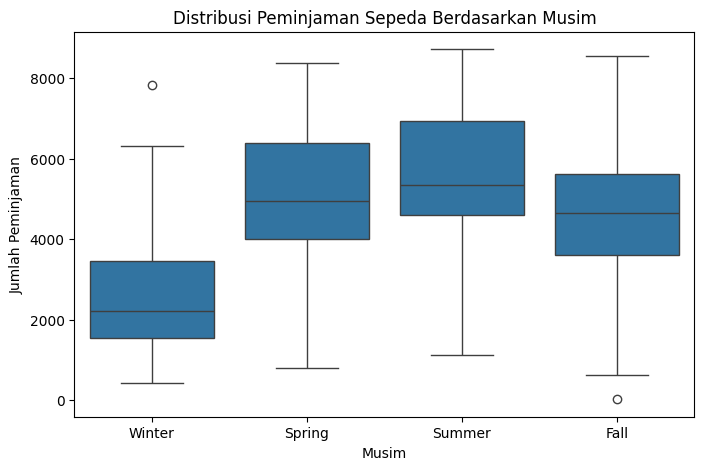

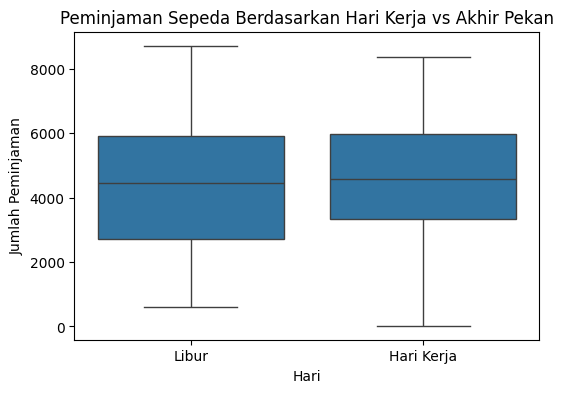

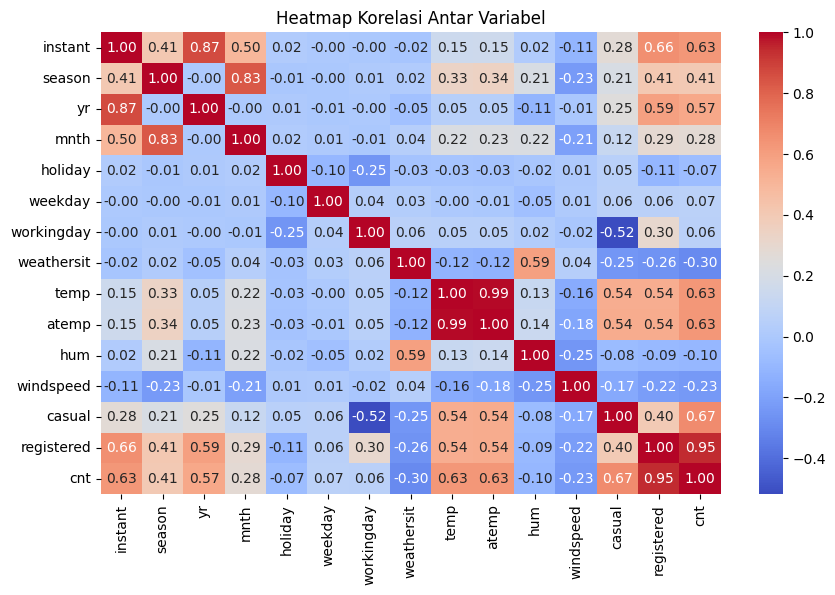

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
day_df = pd.read_csv('day.csv')  # Pastikan path benar

# 🔹 **1. Filter hanya kolom numerik sebelum menghitung korelasi**
numeric_df = day_df.select_dtypes(include=["number"])  # Ambil hanya kolom numerik

# 🔹 **2. Analisis jumlah peminjaman berdasarkan musim**
plt.figure(figsize=(8, 5))
sns.boxplot(x="season", y="cnt", data=day_df)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.show()

# 🔹 **3. Analisis jumlah peminjaman berdasarkan hari kerja vs akhir pekan**
plt.figure(figsize=(6, 4))
sns.boxplot(x="workingday", y="cnt", data=day_df)
plt.xticks(ticks=[0, 1], labels=['Libur', 'Hari Kerja'])
plt.title("Peminjaman Sepeda Berdasarkan Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari")
plt.ylabel("Jumlah Peminjaman")
plt.show()

# 🔹 **4. Korelasi antara variabel dalam dataset harian (Diperbaiki)**
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")  # Gunakan hanya kolom numerik
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()


### Pertanyaan 2:

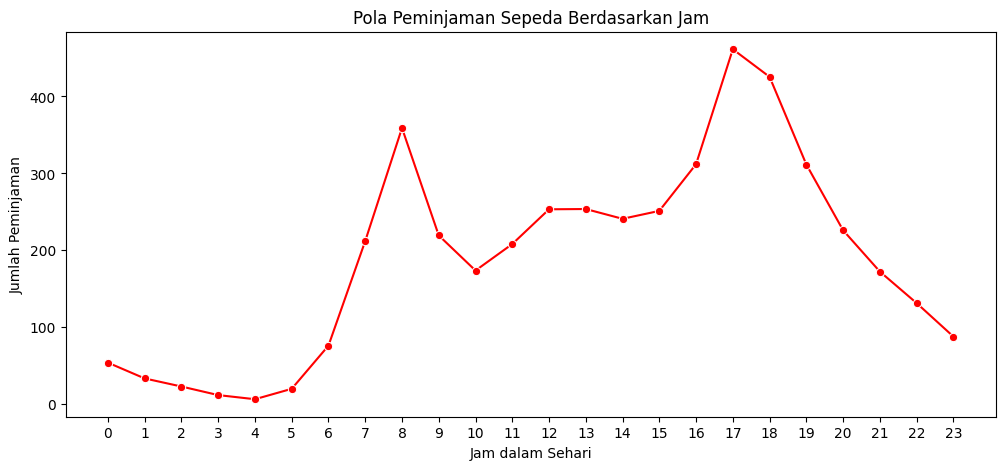

In [25]:
# Pola peminjaman sepeda berdasarkan jam (dari dataset hourly)
plt.figure(figsize=(12, 5))
sns.lineplot(x="hr", y="cnt", data=hour_df, errorbar=None, marker="o", linestyle="-", color="r")
plt.xticks(range(0, 24))
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Peminjaman")
plt.show()



**Insight Pertanyaan 1:**
- Faktor temperatur (temp) memiliki korelasi positif yang kuat dengan jumlah peminjaman. Saat suhu lebih hangat, peminjaman meningkat.
- Hujan dan kondisi cuaca buruk (weathersit) mengurangi jumlah peminjaman, karena kondisi jalan yang basah mungkin membuat pengguna enggan bersepeda.

**Insight Pertanyaan 2:**
- Jam sibuk peminjaman sepeda terjadi antara pukul 07:00 - 09:00 pagi dan 17:00 - 19:00 sore pada hari kerja, yang menunjukkan penggunaan untuk keperluan transportasi ke/dari kantor.
- Pada akhir pekan, peminjaman lebih stabil sepanjang siang hari, dengan puncak tertinggi sekitar siang hingga sore hari (10:00 - 17:00), yang bisa menjadi waktu terbaik untuk promosi.


## Analisis Lanjutan (Opsional)

## Conclusion

- 1. Faktor apa saja yang paling memengaruhi jumlah peminjaman sepeda setiap harinya?
A. Cuaca dan suhu sangat berpengaruh terhadap jumlah peminjaman sepeda. Peminjaman meningkat saat suhu lebih hangat dan menurun drastis saat hujan atau salju.
B. Hari kerja dan akhir pekan menunjukkan pola penggunaan yang berbeda. Pada hari kerja, peminjaman lebih tinggi karena banyak pengguna mengandalkan sepeda untuk transportasi ke kantor atau sekolah. Sedangkan pada akhir pekan, pola peminjaman lebih santai dan merata sepanjang hari.
- 2. Kapan waktu terbaik untuk meningkatkan layanan atau promosi terkait penyewaan sepeda?
A. Jam sibuk pada hari kerja terjadi pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00), yang menunjukkan bahwa sepeda banyak digunakan untuk perjalanan pulang-pergi kerja. Promosi seperti diskon atau layanan tambahan bisa difokuskan pada jam-jam ini.
B. Akhir pekan memiliki pola peminjaman yang lebih stabil sepanjang siang hingga sore hari, sehingga promosi berbasis wisata atau rekreasi bisa lebih efektif dilakukan saat itu.